#**CIENCIA Y ANALÍTICA DE DATOS - MIGUEL MARINES**
##**<u>Preprocesamiento de Datos</u>**
---
---

In [40]:
# Google Drive en Google Colab.
# Acceso a los archivos y directorios almacenados en Google Drive desde un notebook de Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Importación de la librería "os" para manipular rutas de archivos.
# Ruta del directorio que se desea establecer como directorio de trabajo.
 # Se cambia el directorio de trabajo actual al especificado en la variable "DIR".
import os
DIR = "/content/drive/MyDrive/Ciencia_Analitica_Datos"
os.chdir(DIR)

In [42]:
# Importación de librerías.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew

In [43]:
# Carga de archivo CSV.
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Se determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y se utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Se separa el análisis según el tipo de datos (number, object).

**139 Variables Numéricas.
11 Variables de Texto.**

In [44]:
# Variables numéricas y variables de texto.
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [45]:
# Otra forma de calcular el número de variables numéricas y variables de texto.
columnas_numericas = response_df.select_dtypes(include = ['number'])
columnas_texto = response_df.select_dtypes(include = ['object'])

# Mostrar resultados.
print("Número de Variables Numéricas:", columnas_numericas.shape[1])
print("Número de Variables de Texto:", columnas_texto.shape[1])

Número de Variables Numéricas: 139
Número de Variables de Texto: 11


In [46]:
# Resumen de las estadísticas descriptivas para las variables numéricas.
print("\nResumen de las Estadísticas Descriptivas para las Variables Numéricas:")
response_df.describe(include = 'number').T


Resumen de las Estadísticas Descriptivas para las Variables Numéricas:


,count,mean,std,min,25%,50%,75%,max
Music,1007.0,4.731877,0.664049,1.0,5.0,5.0,5.0,5.0
Slow songs or fast songs,1008.0,3.328373,0.833931,1.0,3.0,3.0,4.0,5.0
Dance,1006.0,3.113320,1.170568,1.0,2.0,3.0,4.0,5.0
Folk,1005.0,2.288557,1.138916,1.0,1.0,2.0,3.0,5.0
Country,1005.0,2.123383,1.076136,1.0,1.0,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...
Spending on healthy eating,1008.0,3.557540,1.093750,1.0,3.0,4.0,4.0,5.0
Age,1003.0,20.433699,2.828840,15.0,19.0,20.0,22.0,30.0
Height,990.0,173.514141,10.024505,62.0,167.0,173.0,180.0,203.0
Weight,990.0,66.405051,13.839561,41.0,55.0,64.0,75.0,165.0


In [47]:
# Resumen de las estadísticas descriptivas para las variables de texto.
print("\nResumen de las Estadísticas Descriptivas para las Variables de Texto:")
response_df.describe(include = 'object').T


Resumen de las Estadísticas Descriptivas para las Variables de Texto:


,count,unique,top,freq
Smoking,1002,4,tried smoking,430
Alcohol,1005,3,social drinker,659
Punctuality,1008,3,i am always on time,399
Lying,1008,4,sometimes,549
Internet usage,1010,4,few hours a day,744
Gender,1004,2,female,593
Left - right handed,1007,2,right handed,906
Education,1009,6,secondary school,621
Only child,1008,2,no,754
Village - town,1006,2,city,707


2. Se clasifica la variable `Weight` según su escala de medición. En función de ello se elije el gráfico a generar (histograma / barras) y se fundamenta la elección.


**La escala de medición de la variable Weight es de tipo cuantitativa continua, ya que su tipo de dato es float. La gráfica de histograma es ideal para visualizar la distribución de datos cuantitativos continuos como es el caso del peso, ya que se puede mostrar los diferentes rangos en los diferentes bins para poder identificar las tendencias y patrones. Especialmente, se eligió la gráfica del histograma porque no hay espacios entre las barras o bins, ya que los valores son continuos y se agrupan en intervalos.**

In [48]:
# Clasificación de la variable Weight según su escala de medición.
tipo = response_df["Weight"].dtype

if pd.api.types.is_numeric_dtype(tipo):

  if response_df["Weight"].nunique() / len(response_df) < 0.05:
    print("Clasificación de la Variable: Cuantitativa Discreta")
  else:
    print("Clasificación de la Variable: Cuantitativa Continua")

else:
  print("Clasificación de la Variable: Cualitativa")

Clasificación de la Variable: Cuantitativa Continua


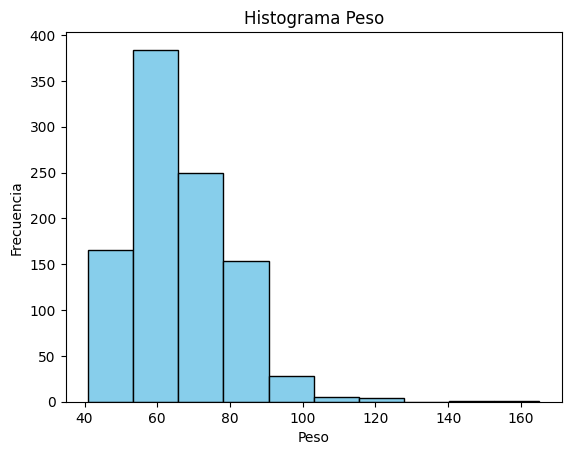

In [49]:
# Gráfica Histograma
plt.hist(response_df["Weight"], bins = 10, color = 'skyblue', edgecolor = 'black')

# Etiquetas y Título
plt.xlabel("Peso")
plt.ylabel("Frecuencia")
plt.title("Histograma Peso")

# Mostrar Histograma
plt.show()

3. Se clasifica la distribución del peso según su asimetría y se justifican. Se incluye el cálculo numérico que lo demuestra.


**La clasificación de la variable Weight según su asimetría es asimetría positiva, ya que tiene un coeficiente de asimetría de 1.2237251927527477, adicionalmente, en la gráfica se puede notar una cola hacia la derecha.**

Coeficiente de Asimetría: 1.2237251927527477
Clasificación: Asimétrica Positiva (Cola Derecha)



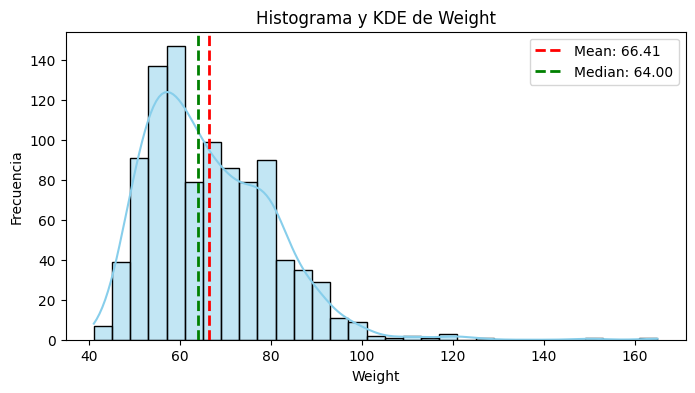

In [50]:
# Asimetría
asimetria = response_df["Weight"].skew()

# Clasificación
if asimetria > 0:
    clasificacion = "Asimétrica Positiva (Cola Derecha)"
elif asimetria < 0:
    clasificacion = "Asimétrica Negativa (Cola Izquierda)"
elif asimetria == 0:
    clasificacion = "Simétrtica"

# Mostrar resultado.
print("Coeficiente de Asimetría:", asimetria)
print("Clasificación:", clasificacion)
print()


# Gráfica Histogrma y KDE
plt.figure(figsize = (8, 4))

# Gráfica con histograma y KDE.
sns.histplot(data=response_df, x = "Weight", kde = True, color = 'skyblue')

# Cálculo del mean y median.
mean_value = response_df["Weight"].mean()
median_value = response_df["Weight"].median()

# Añadir al gráfico el mean y median.
plt.axvline(mean_value, color = 'red', linestyle = 'dashed', linewidth = 2, label = f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color = 'green', linestyle = 'dashed', linewidth = 2, label = f'Median: {median_value:.2f}')

# Construcción de la visualización de la gráfica.
plt.title('Histograma y KDE de Weight')
plt.xlabel('Weight')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?



**20 Valores faltantes en la variable(columna) Weight.
1.98% Porcentaje de valores faltantes en la variable(columna) Weight.**

In [51]:
# Valores faltantes en la columna Weight.
valores_faltantes = response_df["Weight"].isnull().sum()

# Porcentaje de valores faltantes en la columna Weight.
total_valores = len(response_df["Weight"])
porcentaje_faltantes = (valores_faltantes / total_valores) * 100

# Imprimir los resultados
print("Valores faltantes en la variable(columna) Weight:", valores_faltantes)
print("Porcentaje de valores faltantes en la variable(columna) Weight: {:.2f}%".format(porcentaje_faltantes))

Valores faltantes en la variable(columna) Weight: 20
Porcentaje de valores faltantes en la variable(columna) Weight: 1.98%


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Se analíza considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello se divide cada columna en dos grupos: con/sin faltantes en `Weight` y se utilizan métodos gráficos y la prueba t para ver si hay diferencias significativas.

**NOTA**. Se reutilizan las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip.

**En todos los casos el p-value es mayor a 0.05, lo que significa que no hay suficiente evidencia estadística para rechazar la hipótesis nula. En conclusión, no se encontró una asociación significativa de las variables proporcionadas con la variable Weight.**

In [52]:
# Función Diagnose MV Numerical
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df, str_att_name, BM_MV):
    MV_labels = {True:'With Missing Values', False:'Without Missing Values'}

    labels = []
    box_sr = pd.Series('', index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr, vert = False)
    plt.yticks([1, 2], labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10, 4))

    att_range = (df[str_att_name].min(), df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Age:


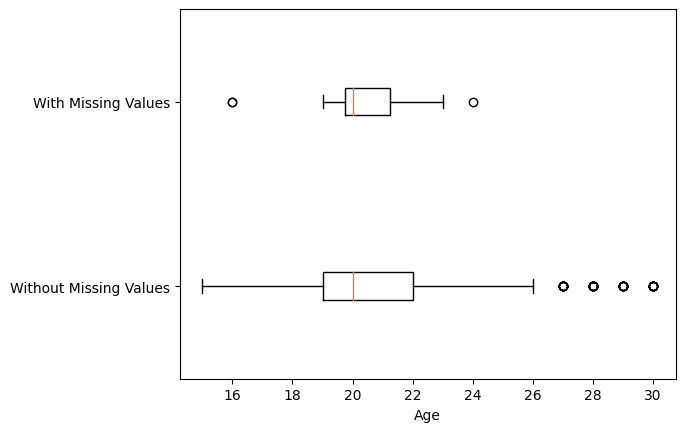

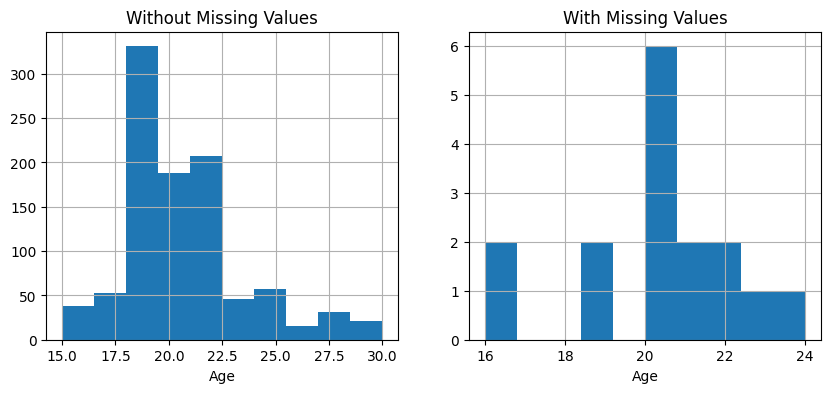

p-value of t-test: 0.7258243979822129
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Number of siblings:


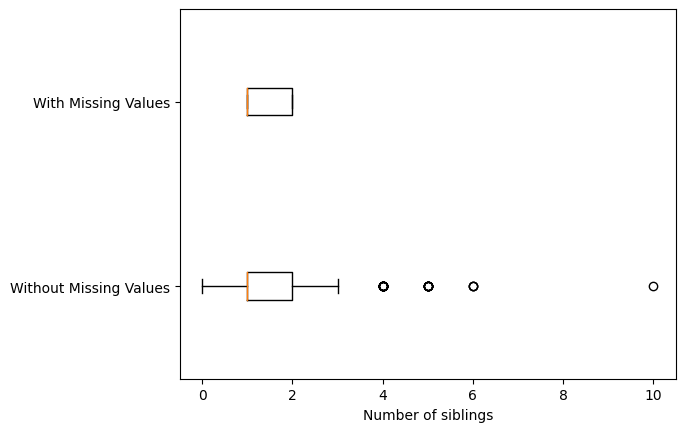

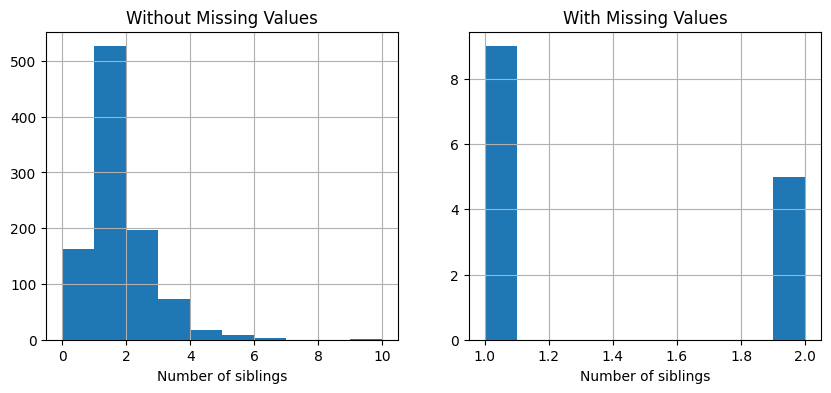

p-value of t-test: 0.8255092107556896
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [53]:
# Aplicación de la función diagnose mv numerical.
numerical_attributes = ['Age', 'Number of siblings']

BM_MV = response_df.Weight.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(response_df, att, BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

In [54]:
# Función Diagnose MV Categorical
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df, str_att_name, BM_MV):
    MV_labels = {True:'With Missing Values', False:'Without Missing Values'}

    plt.figure(figsize = (10,4))
    for i, poss in enumerate(BM_MV.unique()):
        plt.subplot(1, 2, i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV, df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Gender:


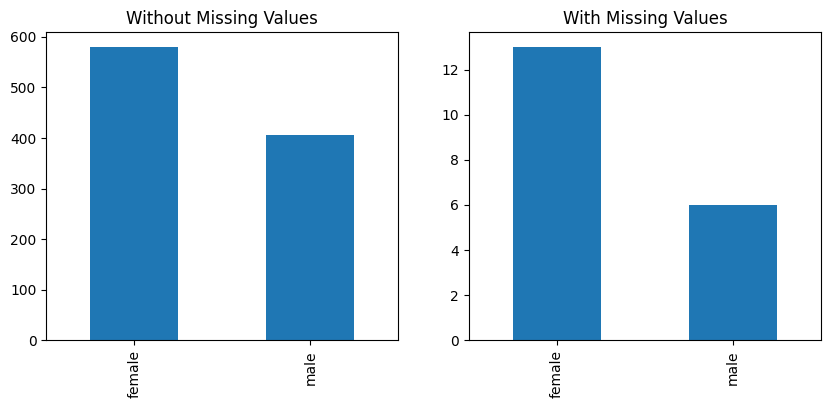

p-value of Chi_squared test: 0.5472167199163878
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Education:


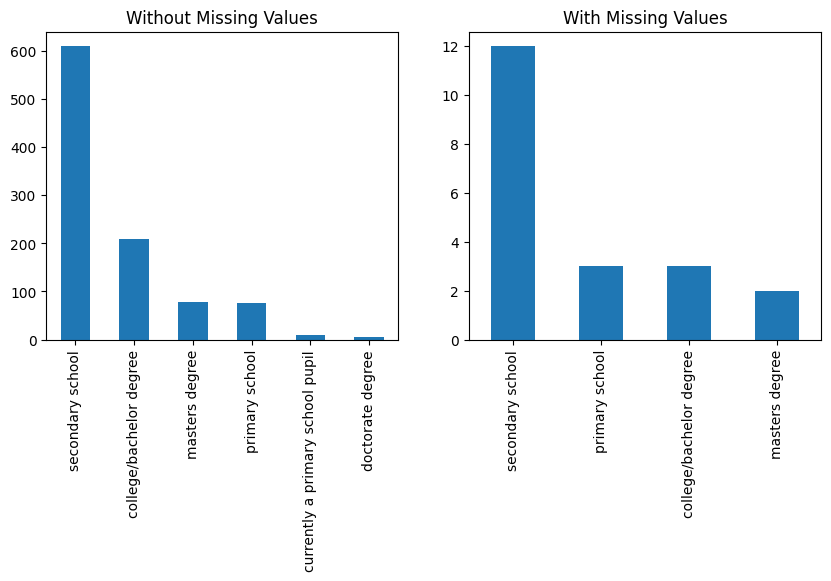

p-value of Chi_squared test: 0.8424822989541867
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [55]:
# Aplicación de la función diagnose mv categorical.
categorical_attributes = ['Gender', 'Education']

BM_MV = response_df.Weight.isna()
for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(response_df, att, BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

6. Se utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

**En base a la gráfica realizada en el punto 3 y al cálculo del coeficiente de asimetría de la variable Weight se puede notar como la variable tiene una distribución sesgada hacía la derecha con sesgo positivo por lo que se usa la mediana para imputar los valores faltantes de la variable Weight.**

In [56]:
# Imputación de valores faltantes de la variable weight.
response_df["Weight"] = response_df["Weight"].fillna(value = response_df["Weight"].median())

In [57]:
# Checar Imputación.

# Valores faltantes en la columna weight.
valores_faltantes = response_df["Weight"].isnull().sum()

# Porcentaje de valores faltantes en la columna weight.
total_valores = len(response_df["Weight"])
porcentaje_faltantes = (valores_faltantes / total_valores) * 100

# Imprimir los resultados.
print("Valores faltantes en la variable(columna) Weight:", valores_faltantes)
print("Porcentaje de valores faltantes en la variable(columna) Weight: {:.2f}%".format(porcentaje_faltantes))

Valores faltantes en la variable(columna) Weight: 0
Porcentaje de valores faltantes en la variable(columna) Weight: 0.00%


7. ¿Hay valores atípicos de la variable `Weight`? Se Confirma con un gráfico de boxplot. ¿Cuántos son? Se almacenan en un dataframe independiente y se eliminan del conjunto original.

**Si, hay 8 valores atípicos de la variable Weight.**

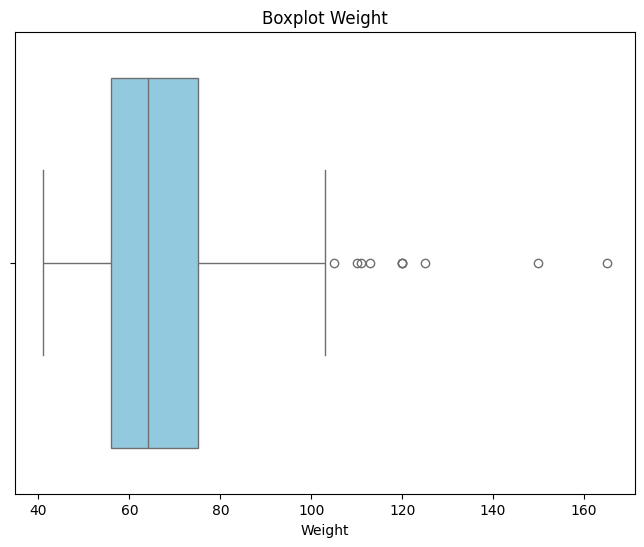

In [58]:
# Boxplot de la variable Weight.
plt.figure(figsize = (8, 6))
sns.boxplot(x = response_df["Weight"], color = 'skyblue')
plt.title("Boxplot Weight")
plt.show()

In [59]:
# IQR (Rango Intercuartílico)
Q1 = response_df["Weight"].quantile(0.25)
Q3 = response_df["Weight"].quantile(0.75)
IQR = Q3 - Q1

# Límites para identificar valores atípicos.
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Valores atípicos y almacenamiento en un nuevo DataFrame.
outliers_weight_df = response_df[(response_df["Weight"] < lower_limit) | (response_df["Weight"] > upper_limit)]

# Eliminación de los valores atípicos del DataFrame original.
response_df = response_df[(response_df["Weight"] >= lower_limit) & (response_df["Weight"] <= upper_limit)]

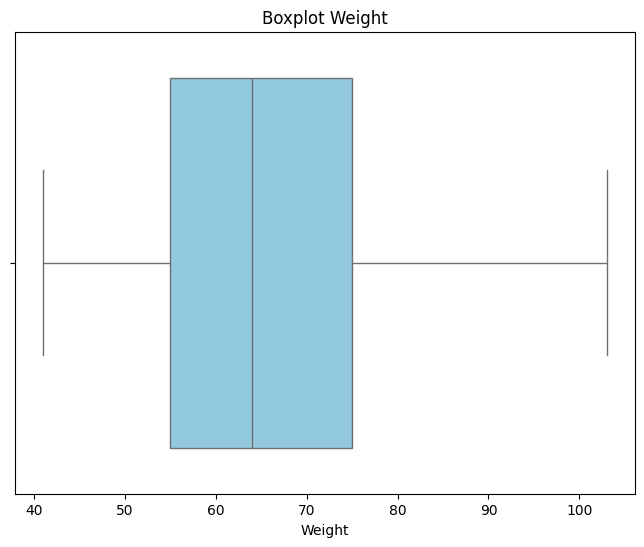

In [60]:
# Boxplot de la variable Weight para verificar eliminacióon de valores atípicos.
plt.figure(figsize = (8, 6))
sns.boxplot(x = response_df["Weight"], color = 'skyblue')
plt.title("Boxplot Weight")
plt.show()

8. Se repite el mismo proceso de valores atípicos con la variable `Height`.

**Hay 3 valores atípicos de la variable Height.**

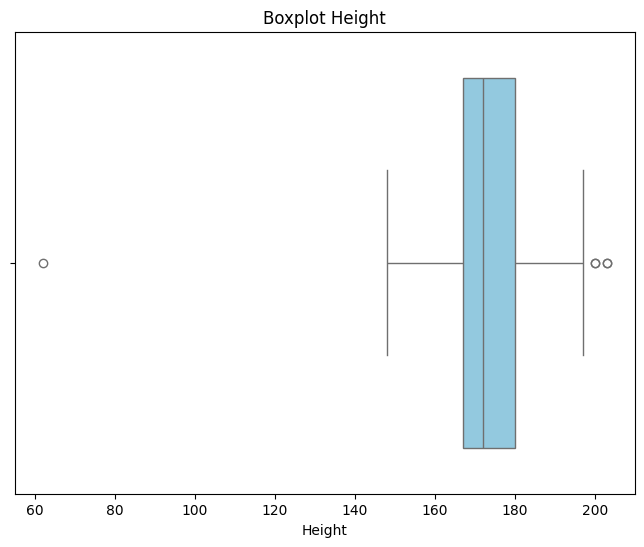

In [61]:
# Boxplot de la variable Height.
plt.figure(figsize = (8, 6))
sns.boxplot(x = response_df["Height"], color = 'skyblue')
plt.title("Boxplot Height")
plt.show()

In [62]:
# IQR (Rango Intercuartílico)
Q1 = response_df["Height"].quantile(0.25)
Q3 = response_df["Height"].quantile(0.75)
IQR = Q3 - Q1

# Límites para identificar valores atípicos.
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificación de valores atípicos y almacenamiento en un nuevo DataFrame.
outliers_height_df = response_df[(response_df["Height"] < lower_limit) | (response_df["Height"] > upper_limit)]

# Eliminación de los valores atípicos del DataFrame original.
response_df = response_df[(response_df["Height"] >= lower_limit) & (response_df["Height"] <= upper_limit)]

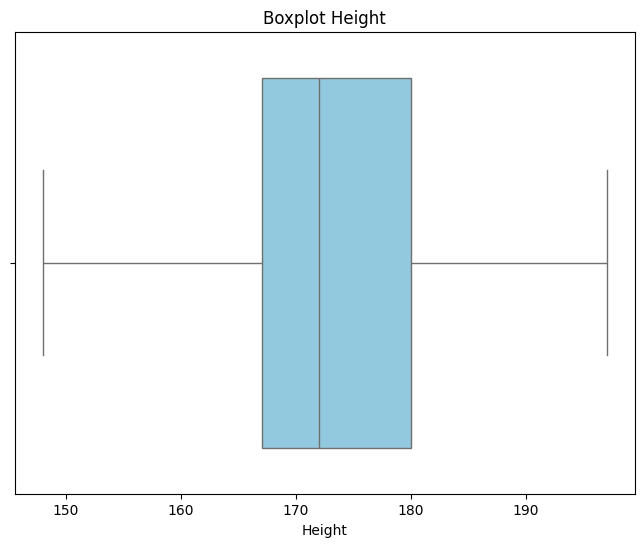

In [63]:
# Boxplot de la variable Height para verificar eliminacióon de valores atípicos.
plt.figure(figsize = (8, 6))
sns.boxplot(x = response_df["Height"], color = 'skyblue')
plt.title("Boxplot Height")
plt.show()

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` se calcula usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que se debe convertir a metros.

**Si, hay 5 encuestados que son atípicos según su índice de masa corporal (BMI).**

In [64]:
# Calculo del BMI (Body Mass Index).
response_df["BMI"] = response_df["Weight"] / ((response_df["Height"] / 100) ** 2)

# Mostrar Resultado
response_df["BMI"]

0       18.066167
1       21.829952
2       21.629649
3       19.943213
4       20.415225
          ...    
1005    21.192742
1006    23.888441
1007    25.059307
1008    19.379197
1009    21.037253
Name: BMI, Length: 976, dtype: float64

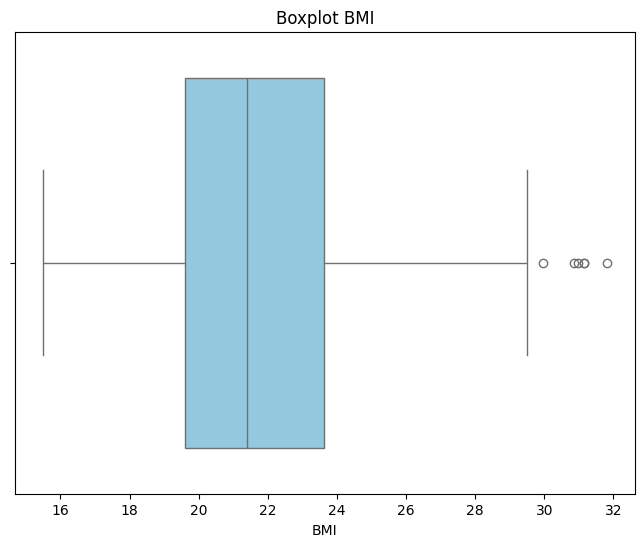

In [65]:
# Boxplot variable BMI.
plt.figure(figsize = (8, 6))
sns.boxplot(x = response_df["BMI"], color = 'skyblue')
plt.title("Boxplot BMI")
plt.show()

10. Se utilizan boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Se comenta un hallazgo que llamó la atención.

**Con respecto al BMI, se puede notar como el valor de los cuartiles y la media en ciertas categorias son más elevados con ciertas clasificaciones. Sin embargo, el hallazgo que más me llamó la atención es la distribución del BMI con la variable categórica Education, ya que se puede visualizar cómo doctorate degre eleva drásticamente los valores de los cuartiles con relación a las demás clasificaciones.**

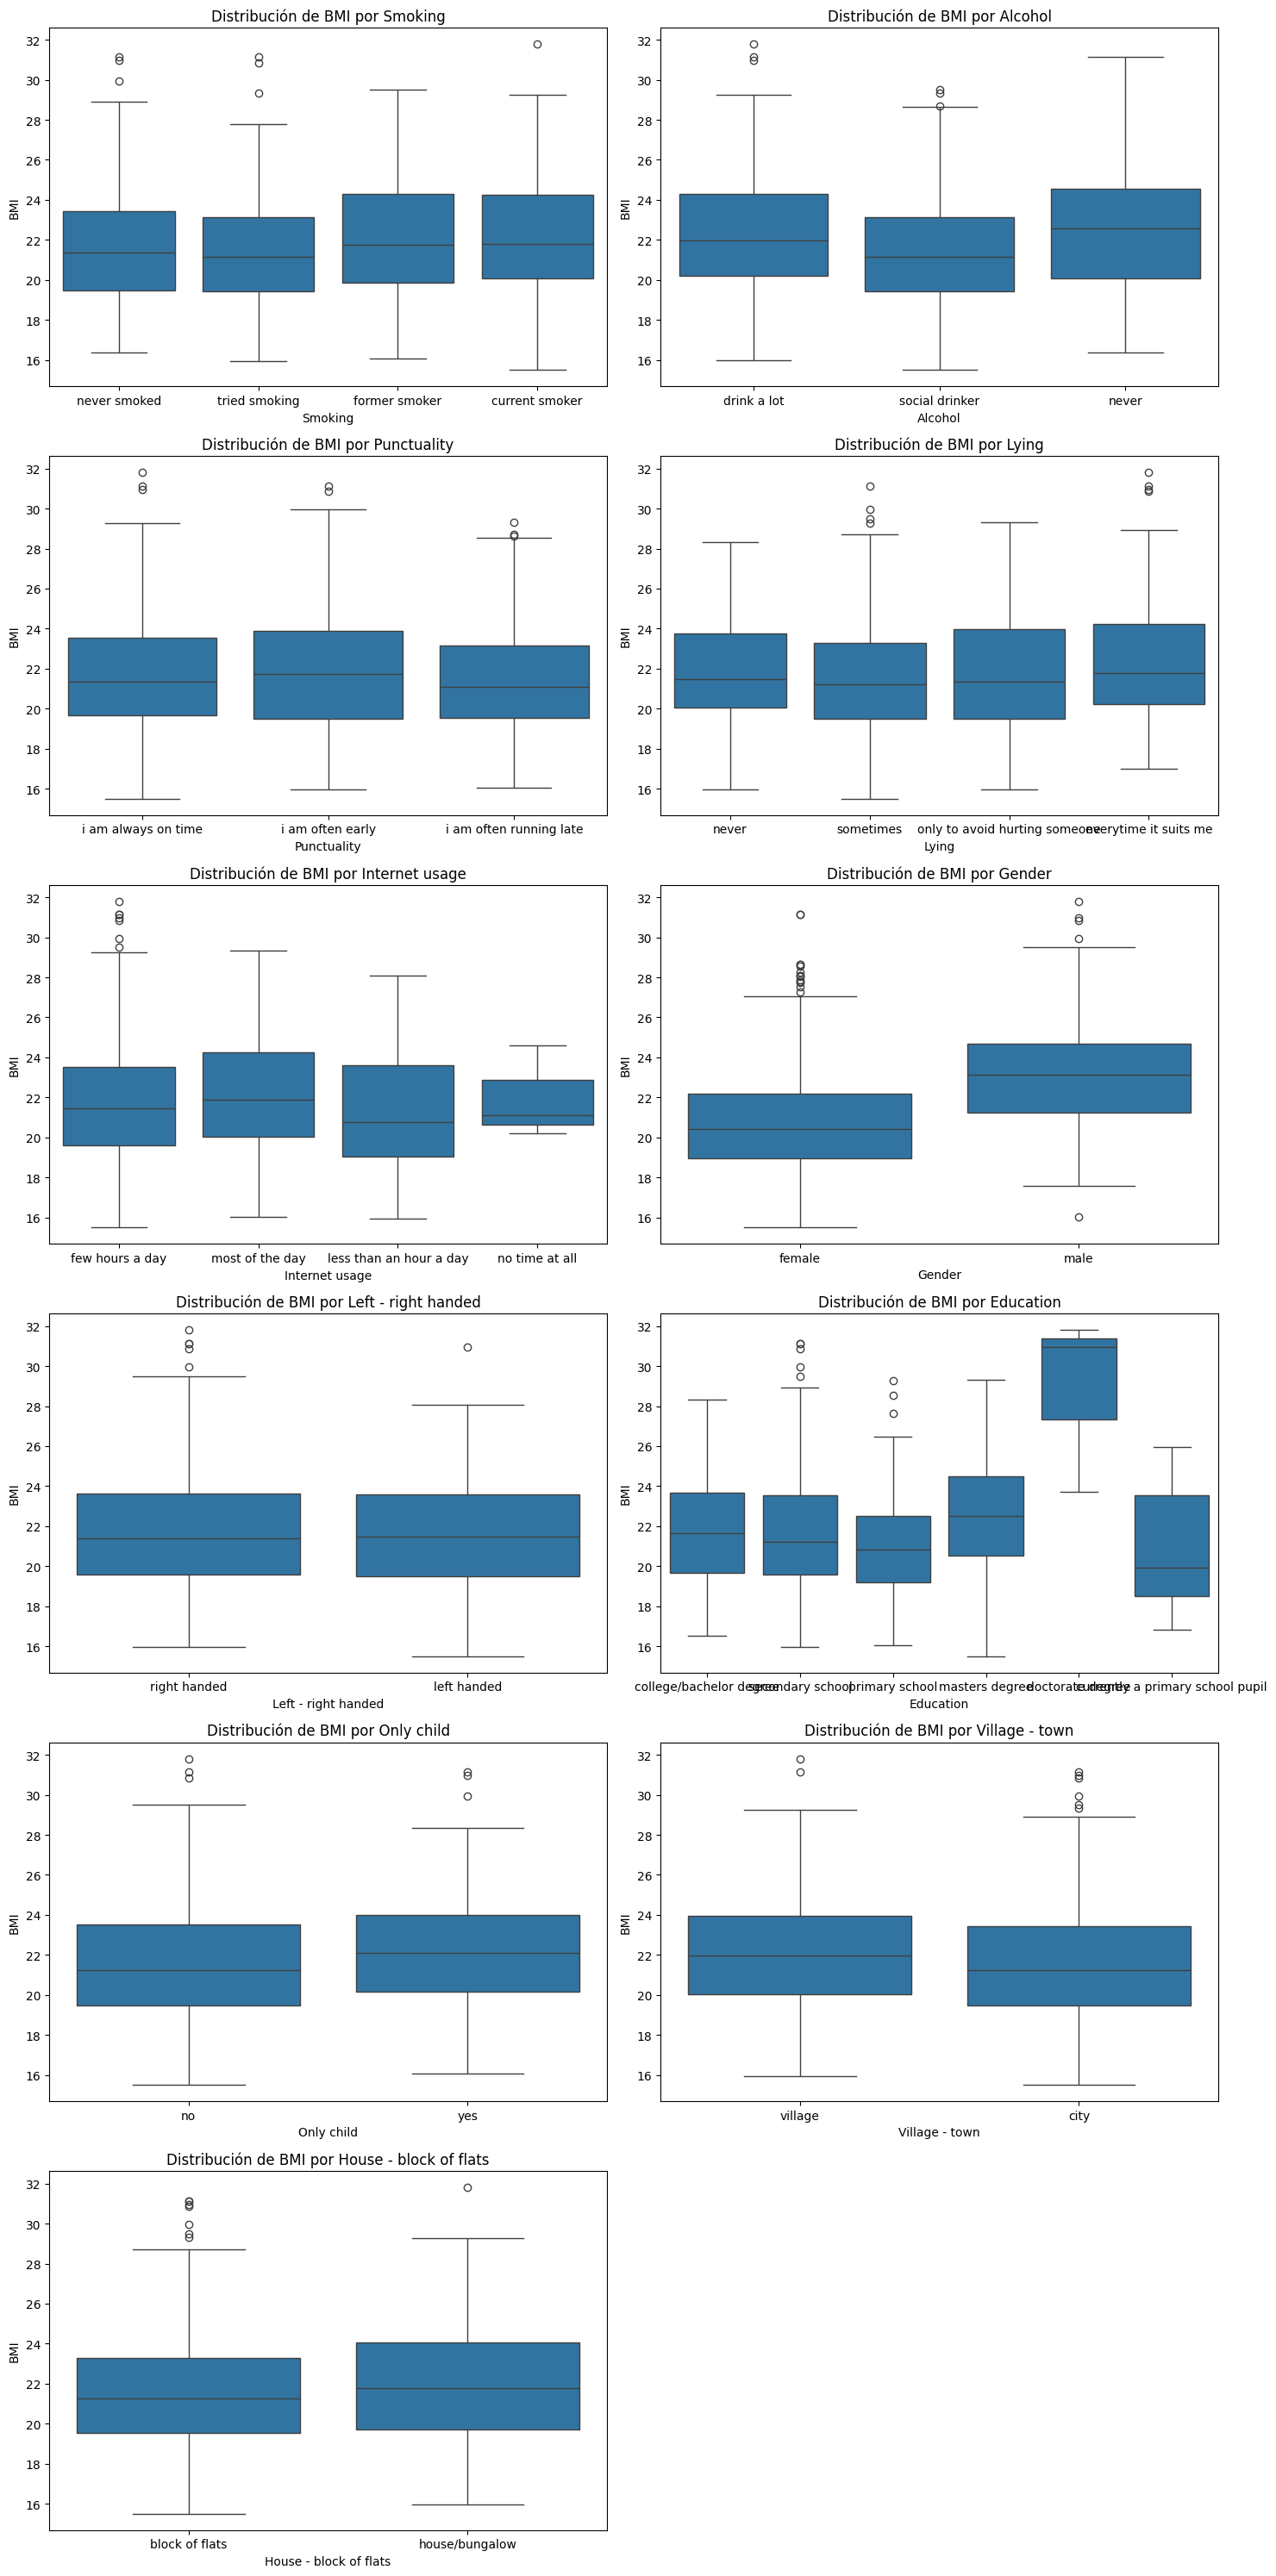

In [66]:
# Variables categóricas de texto.
categorical_variables = ['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage',
       'Gender', 'Left - right handed', 'Education', 'Only child',
       'Village - town', 'House - block of flats']

# Definir el número de filas y columnas.
num_plots = len(categorical_variables)
num_rows = num_plots // 2 + num_plots % 2
num_cols = 2

# Crear subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Generar boxplots para cada variable categórica.
for i, var in enumerate(categorical_variables):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=var, y="BMI", data=response_df, ax=axes[row, col])
    axes[row, col].set_title(f"Distribución de BMI por {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel("BMI")

# Eliminar subplots no utilizados.
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

<ipython-input-67-6d2b71c2549f>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)  # Añadir esta línea
<ipython-input-67-6d2b71c2549f>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)  # Añadir esta línea
<ipython-input-67-6d2b71c2549f>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)  # Añadir esta línea
<ipython-input-67-6d2b71c2549f>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)  # Añadir esta línea
<ipython-input-67-6d2b71c2549f>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(axes[row

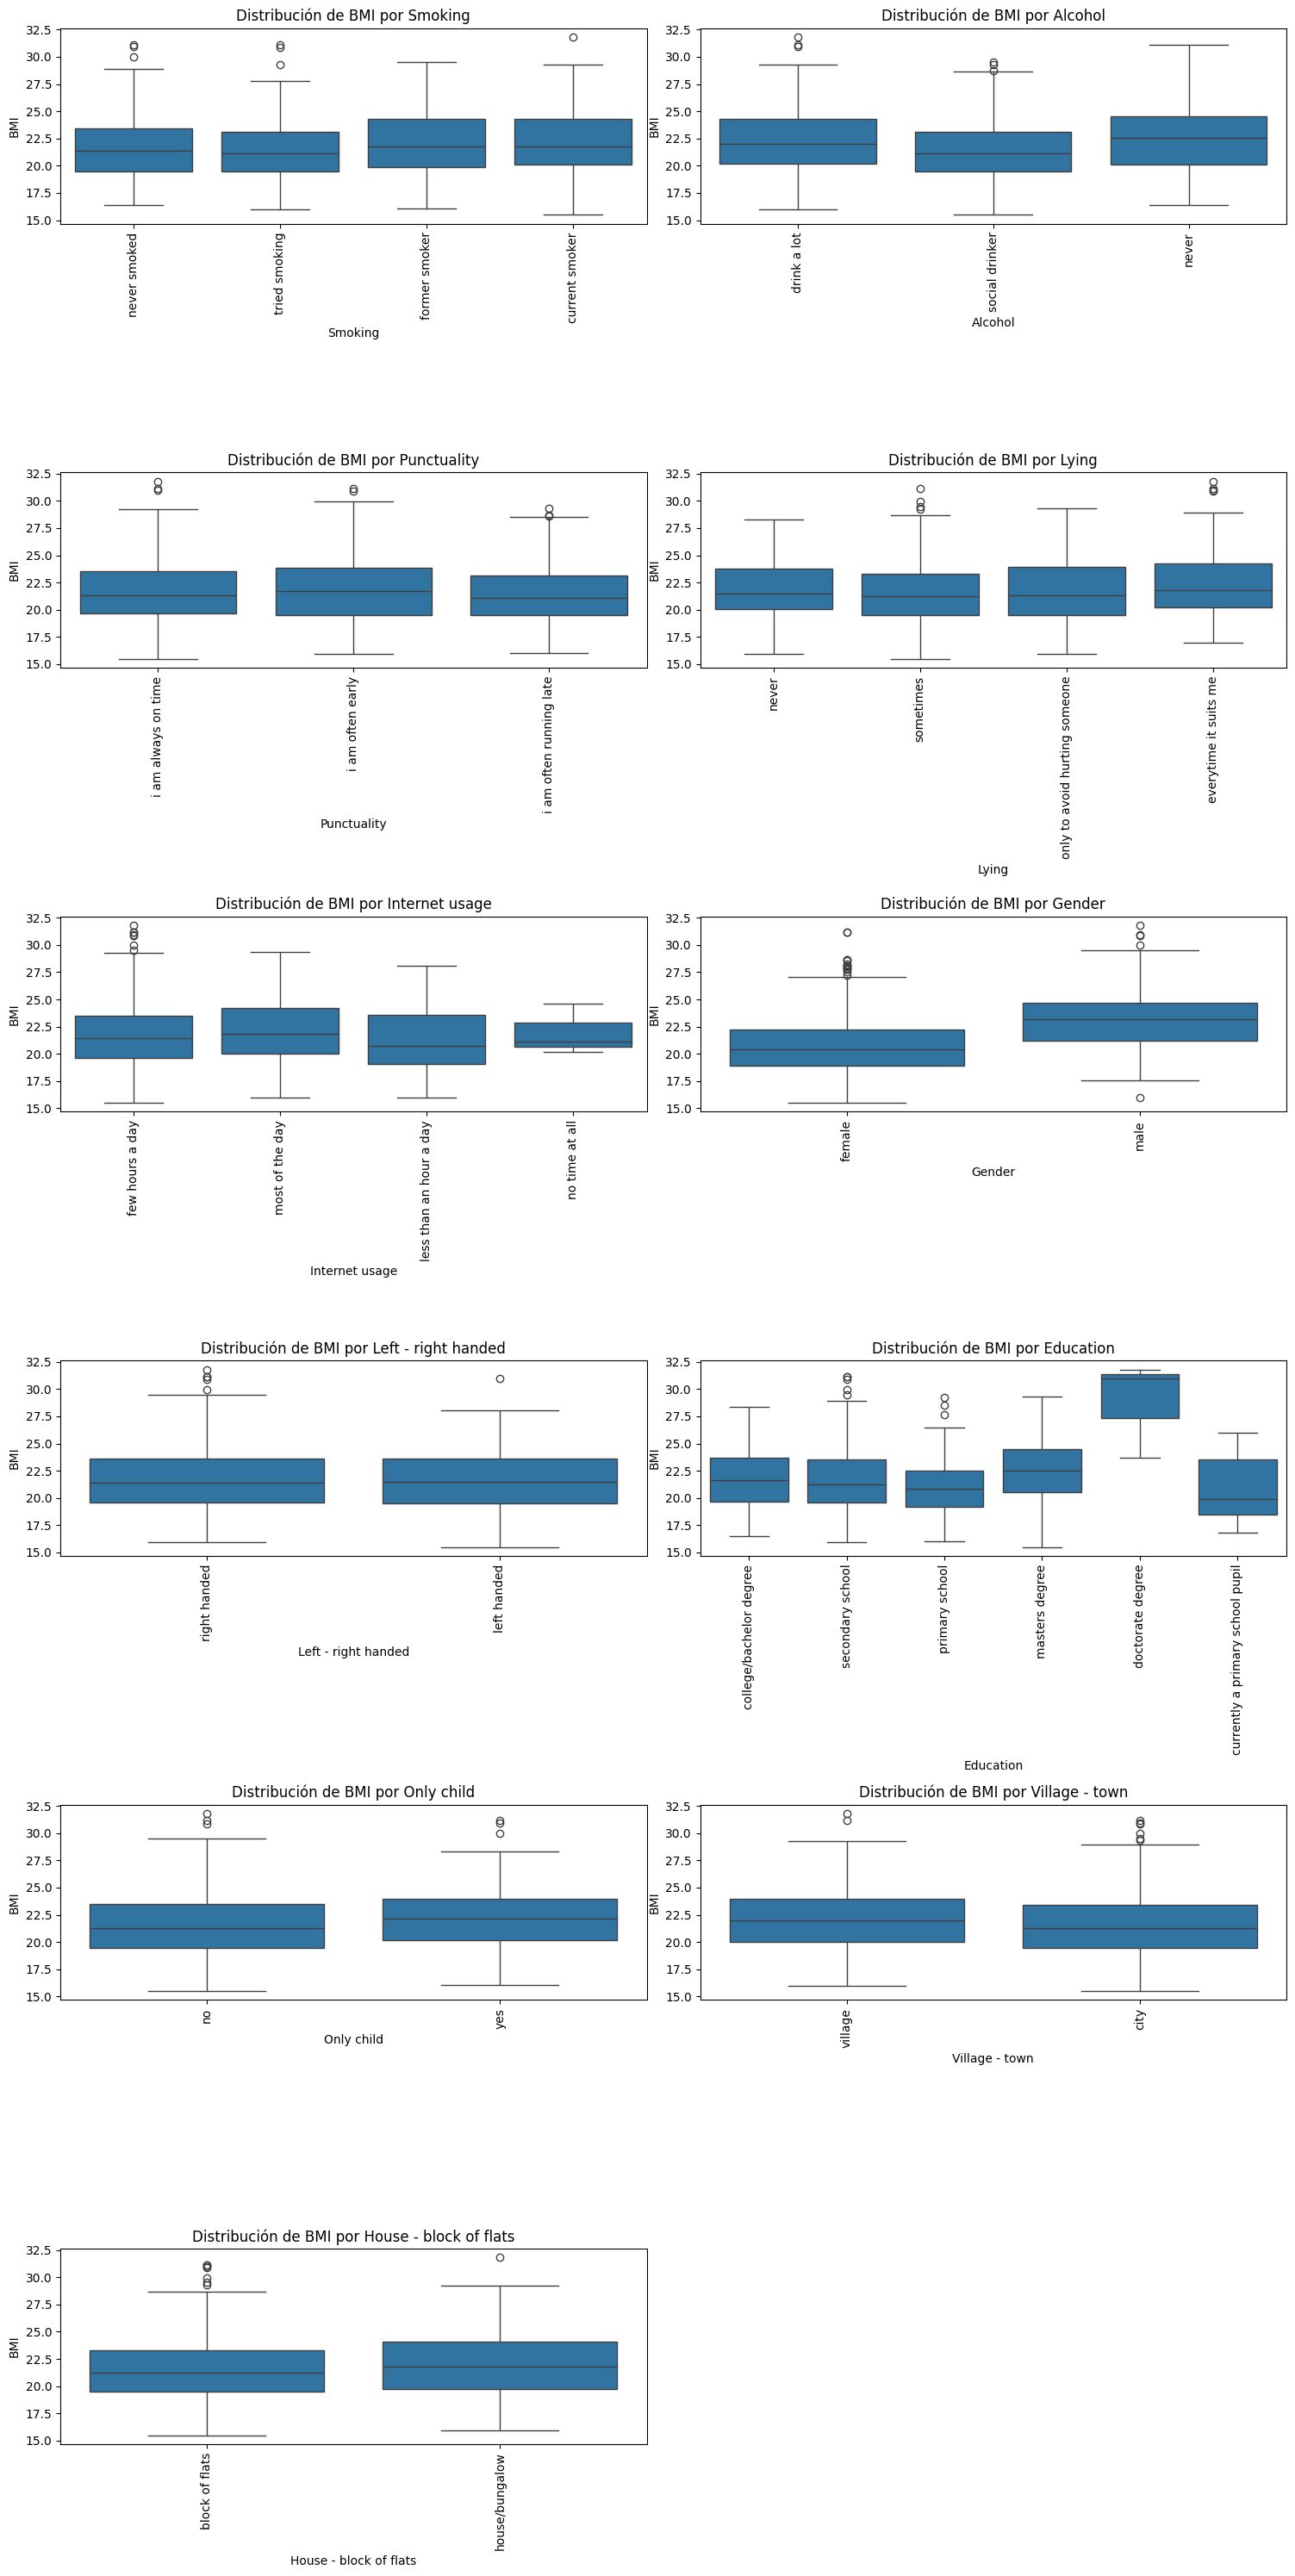

In [67]:
# OTRA FORMA DE GRÁFICAR
# Variables categóricas de texto.
categorical_variables = ['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage',
       'Gender', 'Left - right handed', 'Education', 'Only child',
       'Village - town', 'House - block of flats']

# Definir el número de filas y columnas.
num_plots = len(categorical_variables)
num_rows = num_plots // 2 + num_plots % 2
num_cols = 2

# Crear subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Generar boxplots para cada variable categórica.
for i, var in enumerate(categorical_variables):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=var, y="BMI", data=response_df, ax=axes[row, col])
    axes[row, col].set_title(f"Distribución de BMI por {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel("BMI")
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)  # Añadir esta línea

# Eliminar subplots no utilizados.
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()
